Data Mining 2019/20

In [17]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [18]:
df = pd.read_csv('test.csv')

In [19]:
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,5951,0,10/26/2010,MANHEIM,2003,7,CHEVROLET,AVALANCHE 1500 2WD V,150,4D SUV-PICKUP 5.3L,...,11726.0,13312.0,YES,GREEN,835,85040,AZ,11390.0,0,1572
1,42116,0,1/27/2010,OTHER,2006,4,FORD,MUSTANG V6,Bas,2D COUPE,...,12940.0,14160.0,NaN,NaN,17675,27407,NC,7700.0,0,803
2,5554,0,9/3/2009,MANHEIM,2004,5,DODGE,STRATUS V6,ES,4D SEDAN,...,3528.0,4842.0,NaN,NaN,99740,85040,AZ,5700.0,0,1389
3,25195,0,1/21/2010,OTHER,2004,6,HYUNDAI,TIBURON,Bas,2D COUPE,...,7654.0,9286.0,NaN,NaN,3453,80229,CO,5155.0,0,920
4,51232,0,3/18/2009,MANHEIM,2004,5,CHEVROLET,TRAILBLAZER 2WD 6C 4,Nor,4D SUV 4.2L LT,...,7158.0,8379.0,NaN,NaN,22916,80011,CO,6785.0,0,1155


I tipi mi sembrano tutti giusti, considerando che degli attributi che sono int64 o float64, gli unici di cui ha senso calcolare la media sono tutti gli MMR, VehBCost, WarrantyCost, e volendo anche vehOdo, vehYear e vehAge. Gli altri son tutti o contatori (refId e BYRNO) o categorie (tutti gli altri)

In [20]:
df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,14597.000000,14597.000000,14597.000000,14597.000000,14001.000000,14597.000000,14592.000000,14592.000000,14592.000000,14592.000000,14527.000000,14527.000000,14527.000000,14527.000000,14597.000000,14597.000000,14597.000000,14597.000000,14597.000000
mean,36285.596424,0.121121,2005.336713,4.183394,1.489251,71587.614510,6132.034539,7376.529605,8496.017338,9847.568668,6133.740759,7393.576169,8774.355407,10146.018793,26292.446530,57714.278208,6734.638166,0.023704,1278.484689
std,21016.286354,0.326279,1.723049,1.705746,0.523220,14529.733127,2483.401798,2750.350890,3177.027113,3413.564542,2444.217648,2702.043233,3108.075547,3332.755750,25365.376206,26169.282500,1790.800520,0.152129,598.708956
min,16.000000,0.000000,2001.000000,0.000000,0.000000,8706.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1920.000000,0.000000,462.000000
25%,18220.000000,0.000000,2004.000000,3.000000,1.000000,62006.000000,4267.750000,5396.750000,6282.750000,7478.000000,4273.000000,5410.000000,6525.000000,7767.500000,17675.000000,30331.000000,5440.000000,0.000000,853.000000
50%,36174.000000,0.000000,2005.000000,4.000000,1.000000,73364.000000,6097.500000,7294.000000,8434.000000,9742.000000,6059.000000,7322.000000,8718.000000,10089.000000,19662.000000,73108.000000,6705.000000,0.000000,1169.000000
75%,54548.000000,0.000000,2007.000000,5.000000,2.000000,82460.000000,7766.000000,9035.250000,10649.250000,12113.000000,7724.000000,9011.000000,10914.000000,12313.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73004.000000,1.000000,2009.000000,9.000000,3.000000,113617.000000,33543.000000,36701.000000,36726.000000,40137.000000,33369.000000,36478.000000,36539.000000,39896.000000,99761.000000,98064.000000,45469.000000,1.000000,6819.000000


SCARTEREI:
PRIMEUNIT,AUCGUART
Dobbiamo ricordarci, in caso in cui consegnassimo alcune di queste tabelle nel report, di NON usare tutti gli attributi come in questo caso ma filtrare solo quelli per cui i valori mostrati hanno senso


In [21]:
sum_ = df.isnull().sum()
sum_[sum_ != 0]

Trim                                   449
SubModel                                 1
Color                                    1
Transmission                             1
WheelTypeID                            596
WheelType                              597
Nationality                              1
Size                                     1
TopThreeAmericanName                     1
MMRAcquisitionAuctionAveragePrice        5
MMRAcquisitionAuctionCleanPrice          5
MMRAcquisitionRetailAveragePrice         5
MMRAcquisitonRetailCleanPrice            5
MMRCurrentAuctionAveragePrice           70
MMRCurrentAuctionCleanPrice             70
MMRCurrentRetailAveragePrice            70
MMRCurrentRetailCleanPrice              70
PRIMEUNIT                            13861
AUCGUART                             13861
dtype: int64

In [22]:
df.drop(columns=['RefId']).corr()

,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
IsBadBuy,1.000000,-0.166871,0.174651,-0.032443,0.081402,-0.123064,-0.117461,-0.099056,-0.095479,-0.121086,-0.115975,-0.116459,-0.112457,-0.070028,0.003304,-0.106983,-0.002633,0.060656
VehYear,-0.166871,1.000000,-0.957587,0.252836,-0.284307,0.576166,0.529513,0.576360,0.535398,0.586258,0.544809,0.594838,0.555092,0.276675,0.061390,0.351206,0.057631,-0.272538
VehicleAge,0.174651,-0.957587,1.000000,-0.245926,0.323875,-0.560126,-0.514570,-0.455130,-0.421869,-0.570410,-0.527999,-0.499061,-0.464292,-0.261581,-0.067738,-0.314081,-0.025202,0.264582
WheelTypeID,-0.032443,0.252836,-0.245926,1.000000,-0.217967,-0.098633,-0.129534,-0.076478,-0.102889,-0.095681,-0.125775,-0.081246,-0.107341,0.176690,0.007983,-0.170081,0.012259,-0.129243
VehOdo,0.081402,-0.284307,0.323875,-0.217967,1.000000,-0.011630,0.028182,0.040074,0.070169,-0.022280,0.017495,0.024170,0.055722,-0.273044,-0.050925,-0.052443,0.023643,0.413495
MMRAcquisitionAuctionAveragePrice,-0.123064,0.576166,-0.560126,-0.098633,-0.011630,1.000000,0.990850,0.911203,0.911584,0.939151,0.934749,0.873868,0.873469,0.103458,0.040115,0.791741,0.042121,-0.053332
MMRAcquisitionAuctionCleanPrice,-0.117461,0.529513,-0.514570,-0.129534,0.028182,0.990850,1.000000,0.904209,0.919449,0.925466,0.934145,0.863323,0.873559,0.061259,0.036218,0.783045,0.041891,-0.024747
MMRAcquisitionRetailAveragePrice,-0.099056,0.576360,-0.455130,-0.076478,0.040074,0.911203,0.904209,1.000000,0.990659,0.852901,0.851894,0.914534,0.908145,0.105640,0.031867,0.747738,0.084251,-0.053193
MMRAcquisitonRetailCleanPrice,-0.095479,0.535398,-0.421869,-0.102889,0.070169,0.911584,0.919449,0.990659,1.000000,0.848978,0.858458,0.905192,0.909089,0.068964,0.027965,0.746319,0.081585,-0.027821
MMRCurrentAuctionAveragePrice,-0.121086,0.586258,-0.570410,-0.095681,-0.022280,0.939151,0.925466,0.852901,0.848978,1.000000,0.990668,0.914782,0.911944,0.108504,0.038077,0.780677,0.041418,-0.056424


Pandas è un bravo ragazzo, e ha eliminato di sua spontanea iniziativa PRIMEUNIT e AUCGUART. Ha anche tolto purchDate, auction, Make, Model, Trim, SubModel, Color, Transmission, WheelType (ha mantenuto l'id), Nationality, Size, TopThreeAmericanNames, VNST. 
- WarrantyCost e vehOdo: macchine con tanti km -> assicurazione costa tanto -> (forse) prob. bad buy?
C'è buona correlazione con tutti gli atttributi relativi al prezzo. Forse dobbiamo, più avanti, spendere un po' di tempo a cercare di cavare qualche variabile sensata da questi valori (che ne so, VehBCost/MMRAcquisitionAuctionAveragePrice e così via)

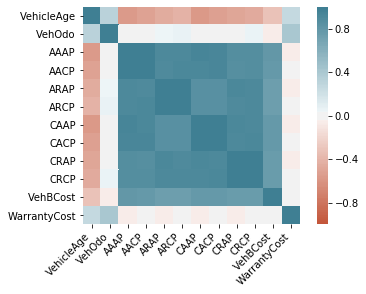

In [23]:
df.rename(columns={ 'MMRAcquisitionAuctionAveragePrice':'AAAP',
                    'MMRAcquisitionRetailAveragePrice':'ARAP',
                    'MMRCurrentAuctionAveragePrice':'CAAP',
                    'MMRCurrentRetailAveragePrice':'CRAP',
                    'MMRAcquisitionAuctionCleanPrice': 'AACP',
                    'MMRAcquisitonRetailCleanPrice': 'ARCP',
                    'MMRCurrentAuctionCleanPrice': 'CACP',
                    'MMRCurrentRetailCleanPrice': 'CRCP'
                  },inplace=True)

corr = df.drop(columns=['RefId',
        'VehYear',
        'IsBadBuy',
        'WheelTypeID',
        'BYRNO',
        'VNZIP1',
        'IsOnlineSale'],
        axis=1).corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Colonne rinominate con gli acronimi per cercare di capire qualcosa 
## +
## Rimosse tutte le colonne "CleanPrice"

Si può già notare come la colonna "VehicleAge" sia inversamente correlata (-0.6 circa) con il prezzo. 

Ciò ha molto senso dato che le auto 🚗 perdono valore con il passare degli anni. 😎

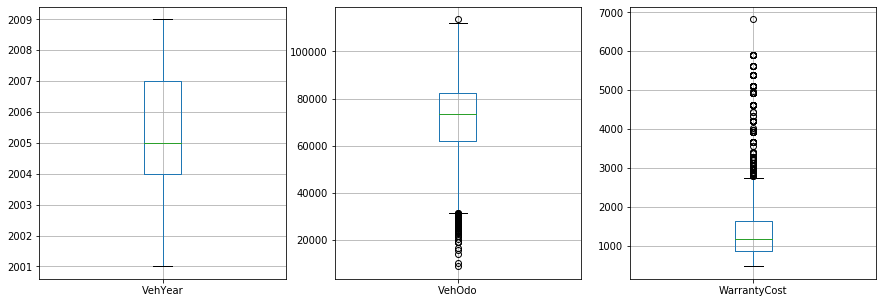

In [24]:
fig = plt.figure(figsize=(15, 5)) 
fig_dims = (1, 3)

plt.subplot2grid(fig_dims, (0, 0))
df.boxplot(column=['VehYear'])

plt.subplot2grid(fig_dims, (0, 1))
df.boxplot(column=['VehOdo'])


plt.subplot2grid(fig_dims, (0, 2))
df.boxplot(column=['WarrantyCost'])

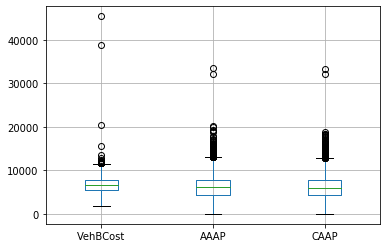

In [25]:
df.boxplot(column=['VehBCost','AAAP','CAAP'])

# Da provare prezzi/marca

In [26]:
pclass_xt = pd.crosstab(df['Transmission'], df['WheelType'])
pclass_xt

WheelType,Alloy,Covers,Special
Transmission,,,
AUTO,7070,6253,151
MANUAL,245,266,15


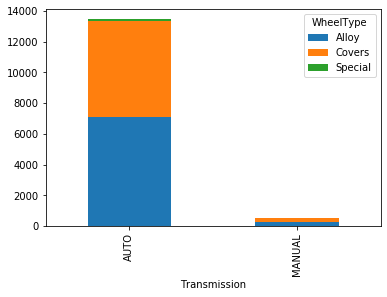

In [27]:
pclass_xt.plot(kind='bar', stacked=True)

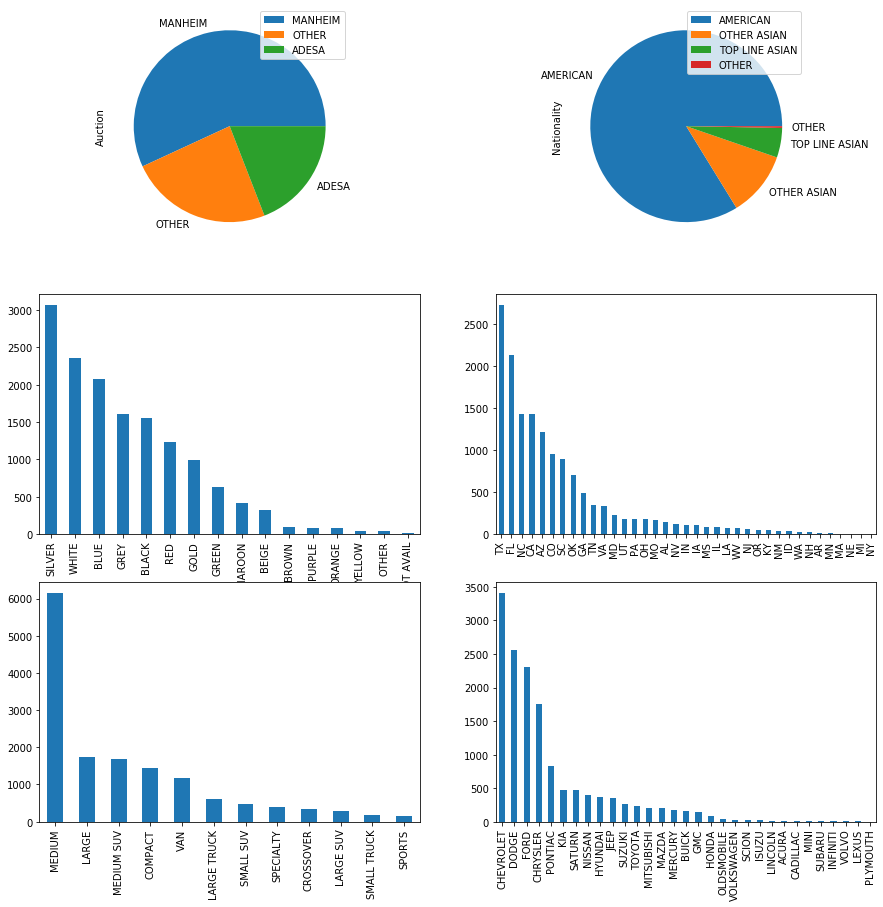

In [28]:
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
df['Auction'].value_counts().plot.pie(legend=True)

plt.subplot2grid(fig_dims, (0, 1))
df['Nationality'].value_counts().plot.pie(legend=True)

plt.subplot2grid(fig_dims, (1, 0))
df['Color'].value_counts().plot(kind='bar')

plt.subplot2grid(fig_dims, (1, 1))
df['VNST'].value_counts().plot(kind='bar')

plt.subplot2grid(fig_dims, (2, 0))
df['Size'].value_counts().plot(kind='bar')

plt.subplot2grid(fig_dims, (2, 1))
df['Make'].value_counts().plot(kind='bar')

In [29]:
df['BYRNO'].value_counts()

99761    752
18880    736
835      589
22916    567
19619    565
3453     565
17675    551
21053    549
21973    538
20740    519
99750    517
17212    511
20928    487
5546     436
20234    422
18822    413
18111    408
23359    403
20833    394
22808    385
8655     384
18881    371
19638    363
16044    322
25100    314
19662    306
20207    283
52117    276
16926    262
8172     219
        ... 
10315     38
10430     35
21047     33
1191      21
1051      18
53245     14
11410     12
1151      10
1045      10
1081       7
1141       7
1085       7
10310      7
1055       5
1031       5
11210      4
1121       4
1041       3
1125       3
1082       2
10410      2
18091      2
16369      2
99760      2
3582       1
1152       1
10510      1
10420      1
1035       1
1156       1
Name: BYRNO, Length: 70, dtype: int64

In [30]:
df.apply(lambda x : 'refID'==326)

RefId                   False
IsBadBuy                False
PurchDate               False
Auction                 False
VehYear                 False
VehicleAge              False
Make                    False
Model                   False
Trim                    False
SubModel                False
Color                   False
Transmission            False
WheelTypeID             False
WheelType               False
VehOdo                  False
Nationality             False
Size                    False
TopThreeAmericanName    False
AAAP                    False
AACP                    False
ARAP                    False
ARCP                    False
CAAP                    False
CACP                    False
CRAP                    False
CRCP                    False
PRIMEUNIT               False
AUCGUART                False
BYRNO                   False
VNZIP1                  False
VNST                    False
VehBCost                False
IsOnlineSale            False
WarrantyCo

In [31]:
df['WheelTypeID'].fillna(4, inplace = True)

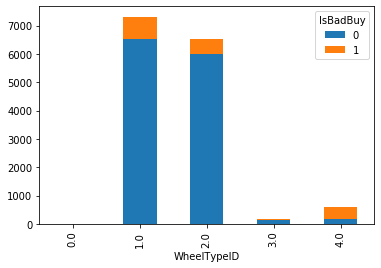

In [32]:
pclass_xt = pd.crosstab(df['WheelTypeID'], df['IsBadBuy'])
pclass_xt.plot(kind='bar', stacked=True)

Adesso cerco di trovare alcuni valori sbagliati (prezzi < 0, prezzi anomali, cose così)

In [182]:
len(df[df['VehBCost'] <= 0]) # numero di elementi in cui il costo è <= 0

0

In [183]:
len([(x, y) for x, y in zip(df['VehBCost'], df['ARCP']) if x > y and y != 0])
#([(x, y, z, odo, year) for x, y, z, odo, year in zip(df['VehBCost'], df['ARCP'], df['Trim'], df['VehOdo'], df['VehYear']) if x > y and y != 0])

2919

Per vedere la lista basta che togliete il commento alla seconda linea.
Non so a me questo sembra assurdo, però pare che sia normale. 2919 macchine sono state acquistate a prezzo maggiore rispetto a quello del concessionario. Questo vale anche per macchine comprate in opzione base ('Bas' nella terza colonna), e con alto chilometraggio. Ci ho messo anche l'anno del veicolo per far capire che non si tratta di auto d'epoca, quindi davvero non ho idea.
Secondo me è una cosa che vale la pena scrivere nel report: macchine vengono anche acquistate a un prezzo maggiore del concessionario anche se usate. Unica cosa dobbiamo capire se in retail ci stanno anche auto usate, e allora quindi tutto questo discorso non vale nulla. Inizialmente speravo di usare questo come controllo che i dati fossero corretti, però...

In [184]:
len([(y, a) for y, a in zip(df['VehYear'], df['VehicleAge']) if a+y < 2009 or a+y > 2010]) # gli anni son tutti corretti

0

In [185]:
len(df[df['VehOdo'] <= 0]) # numero di elementi in cui il contakm è <= 0

0

In [186]:
len(df[df['WarrantyCost'] <= 0]) # numero di elementi in cui il costo della garanzia è <= 0

0

Adesso verifico che in ogni caso, l'acquisto di un veicolo clean (above average condition) costi di più di quello medio (e infatti torna sempre perfetto in ogni caso

In [187]:
len([(x,y) for x,y in zip(df['AAAP'], df['AACP']) if x>y])

0

In [188]:
len([(x,y) for x,y in zip(df['ARAP'], df['ARCP']) if x>y])

0

In [189]:
len([(x,y) for x,y in zip(df['CAAP'], df['CACP']) if x>y])

0

In [190]:
len([(x,y) for x,y in zip(df['CRAP'], df['CRCP']) if x>y])

0

A questo punto cerco di risolvere qualche missing value:
Tutti i currentAuction hanno 250 missing values circa. Pensavo di sostituire, quando quelli medi sono disponibili, current con quelli medi

In [191]:
print(df.at[292, 'CAAP']) # abbiamo 245 missing values, e quello alla riga 292 è un missing value
df['CAAP'].isnull().sum()

nan


245

In [192]:
df['CAAP'].fillna(df['AAAP'],inplace=True)
print(df['CAAP'].isnull().sum()) # ho 13 missing values, che sono quelli di cui mi manca anche il valore medio
print(df.at[292, 'CAAP'] == df.at[292, 'AAAP']) # Ha correttamente riempito CAAP con il valore in AAAP all'id 292

13
True


Adesso devo fare la stessa cosa per gli altri current values

In [193]:
df['CRAP'].fillna(df['ARAP'],inplace=True)
df['CACP'].fillna(df['AACP'],inplace=True)
df['CRCP'].fillna(df['ARCP'],inplace=True)

Qua secondo me è simpatico per far  notare che in generale i bad buy si trovano in 3 zone
- Su macchine praticamente nuove (contakm basso e costo garanzia basso)
- Su macchine usate e rischiose (garanzia alta, contakm intorno a 40000-80000
- Su macchine stra usate

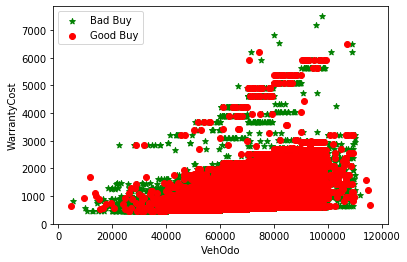

In [194]:
plt.scatter(df[df['IsBadBuy'] == 0]['VehOdo'], 
            df[df['IsBadBuy'] == 0]['WarrantyCost'], color='g', marker='*', label='Bad Buy')
plt.scatter(df[df['IsBadBuy'] == 1]['VehOdo'], 
            df[df['IsBadBuy'] == 1]['WarrantyCost'], color='r',label='Good Buy')
plt.xlabel('VehOdo')
plt.ylabel('WarrantyCost')
plt.legend()
plt.show()

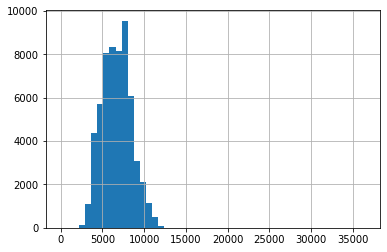

In [195]:
df['VehBCost'].hist(bins=50)
plt.show()

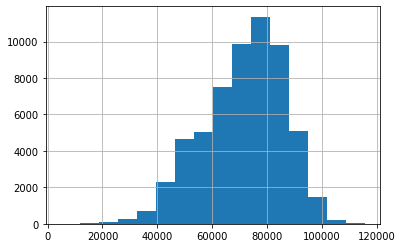

In [196]:
df['VehOdo'].hist(bins=16)
plt.show()

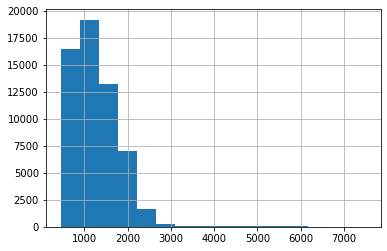

In [197]:
df['WarrantyCost'].hist(bins=16)
plt.show()

## Variable Sostitution & Redundancy Elimination

In [198]:
PAC = ['WA' ,'OR','AK','HI','CA']
MNT = ['MT' ,'WY','ID','NV','UT','CO','AZ','NM']
WNC = ['ND' ,'MN','SD','IA','NE','KS','MO']
WSC = ['OK' ,'AR','TX','LA']
ENC = ['WI' ,'MI','OH','IN','IL']
ESC = ['KY' ,'TN','MS','AL']
MAT = ['NY' ,'PA','NJ']
SAT = ['WV' ,'MD','DE','DC','VA','NC','SC','GA','FL']
NEN = ['ME' ,'NH','VT','MA','CT','RI']

In [199]:
sost = []
for i in df['VNST']:
    if i in PAC:
        sost.append('PAC')
    elif i in MNT:
        sost.append('MNT')
    elif i in WNC:
        sost.append('WNC')
    elif i in WSC:
        sost.append('WSC')
    elif i in ENC:
        sost.append('ENC')
    elif i in ESC:
        sost.append('ESC')
    elif i in MAT:
        sost.append('MAT')
    elif i in SAT:
        sost.append('SAT')
    elif i in NEN:
        sost.append('NEN')
    else:
        sost.append('XXX')

df['Region'] = sost

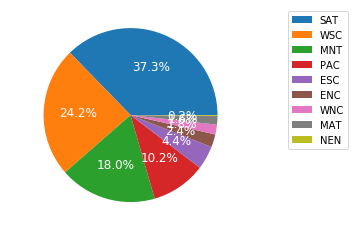

In [200]:
plot = df['Region'].value_counts().plot.pie(legend=True,autopct='%1.1f%%',textprops=dict(color="w",size="12"))
plot.legend(bbox_to_anchor=(1.2,1), loc="upper left")
plot.axes.get_yaxis().set_visible(False)

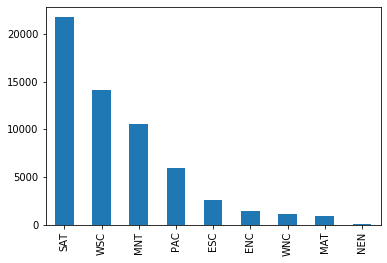

In [201]:
plot = df['Region'].value_counts().plot(kind='bar')

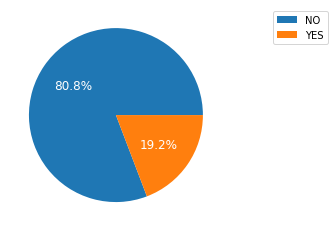

In [202]:
sost = []

for i in df['Trim']:
    if i == 'Bas':
        sost.append('YES')
    else:
        sost.append("NO")

df['IsBase'] = sost
plot = df['IsBase'].value_counts().plot.pie(legend=True,autopct='%1.1f%%',textprops=dict(color="w",size="12"))
plot.legend(bbox_to_anchor=(1.2,1), loc="upper left")
plot.axes.get_yaxis().set_visible(False)

In [203]:
df['IsBase'].isnull().sum()

0

### Eliminazione variabili (idee)

- VehicleYear
- AUCGUART
- PRIMEUNIT
- 

In [204]:
sum_ = df.isnull().sum()
sum_[sum_ != 0]

Trim                     1911
SubModel                    7
Color                       7
Transmission                8
WheelType                2577
Nationality                 4
Size                        4
TopThreeAmericanName        4
AAAP                       13
AACP                       13
ARAP                       13
ARCP                       13
CAAP                       13
CACP                       13
CRAP                       13
CRCP                       13
PRIMEUNIT               55703
AUCGUART                55703
dtype: int64

Per sostituire WheelType ci accorgiamo che raggruppando su IsBase abbiamo mode diverse per i due gruppi

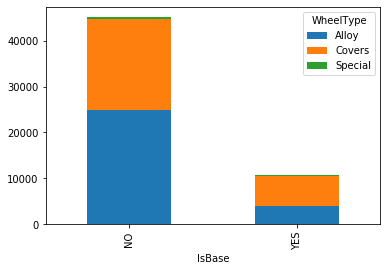

In [205]:
pclass_xt = pd.crosstab(df['IsBase'], df['WheelType'])
pclass_xt.plot(kind='bar', stacked=True)

Sostituisco tutti i missing values di WheelType ID con la moda del gruppo relativo a trim base o no: se il veicolo non è base allora alloy è la moda (vedi grafico sopra)...

In [206]:
df['WheelTypeID'] = df.groupby(['IsBase']).WheelTypeID.apply(lambda x: x.fillna(x.mode()[0]))
df['WheelTypeID'].isnull().sum()

0

Non faccio niente con wheelType perchè secondo me quell'attributo va frullato, tanto è ridondante con wheelTypeID

Per quanto riguarda nationality, ci accorgiamo che i missing values sono tutti di marche americane. Quindi TopThreeAmericanName sarà OTHER in ogni caso, e nationality sarà american

In [119]:
df[df['Nationality'].isnull()][['TopThreeAmericanName', 'Transmission', 'Model', 'Make', 'Nationality']]

,TopThreeAmericanName,Transmission,Model,Make,Nationality
15769,NaN,AUTO,SIERRA 1500,GMC,NaN
18532,NaN,AUTO,NITRO 4WD V6,DODGE,NaN
20016,NaN,AUTO,PATRIOT 2WD 4C,JEEP,NaN
35157,NaN,AUTO,PATRIOT 2WD 4C,JEEP,NaN


In [120]:
df['TopThreeAmericanName'].fillna('OTHER', inplace=True)
df['TopThreeAmericanName'].isnull().sum()

0

In [121]:
df['Nationality'].fillna('OTHER', inplace=True)
df['Nationality'].isnull().sum()

0

Addesso controlliamo i missing values di transmission, e notiamo che la distribuzione è molto più vicina al cambio automatico rispetto a quello manuale, quindi usiamo la moda. Inoltre guardando i missing values notiamo che son tutte macchine americane.

In [122]:
df[df['Transmission'].isnull()][['TopThreeAmericanName', 'Transmission', 'Model', 'Make']]

,TopThreeAmericanName,Transmission,Model,Make
23019,GM,NaN,IMPALA 3.4L V6 SFI,CHEVROLET
28280,FORD,NaN,FREESTAR FWD V6 3.9L,FORD
28961,GM,NaN,GRAND AM V6 3.4L V6,PONTIAC
33225,FORD,NaN,MOUNTAINEER 2WD V8 4,MERCURY
35224,CHRYSLER,NaN,STRATUS V6 2.7L V6 M,DODGE
40504,FORD,NaN,MONTEGO 3.0L V6 EFI,MERCURY
48641,CHRYSLER,NaN,STRATUS V6 2.7L V6 M,DODGE
50661,GM,NaN,S10 PICKUP 2WD 4C 2.,CHEVROLET


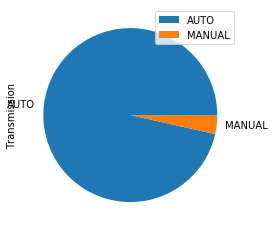

In [123]:
df['Transmission'].value_counts().plot.pie(legend=True)

In [124]:
df['Transmission'].fillna(df['Transmission'].mode()[0], inplace=True)
df['Transmission'].isnull().sum()

0

Per quanto riguarda il colore, abbiamo provato a raggruppare sugli attributi significativi (make, size, year), ma comunque sia la moda era sempre SILVER. 

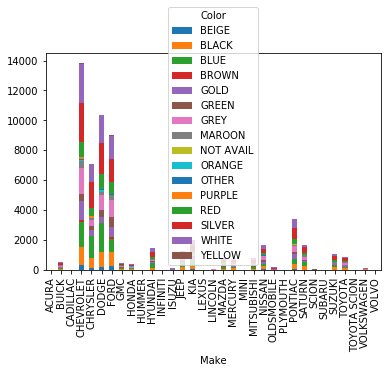

In [125]:
pclass_xt = pd.crosstab(df['Make'], df['Color'])
pclass_xt.plot(kind='bar', stacked=True)

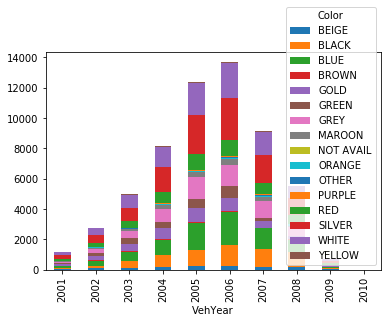

In [126]:
pclass_xt = pd.crosstab(df['VehYear'], df['Color'])
pclass_xt.plot(kind='bar', stacked=True)

In [127]:
df[df['Color'].isnull()][['TopThreeAmericanName', 'Transmission', 'Model', 'Make', 'Color']]

,TopThreeAmericanName,Transmission,Model,Make,Color
23019,GM,AUTO,IMPALA 3.4L V6 SFI,CHEVROLET,NaN
28280,FORD,AUTO,FREESTAR FWD V6 3.9L,FORD,NaN
28961,GM,AUTO,GRAND AM V6 3.4L V6,PONTIAC,NaN
33225,FORD,AUTO,MOUNTAINEER 2WD V8 4,MERCURY,NaN
35224,CHRYSLER,AUTO,STRATUS V6 2.7L V6 M,DODGE,NaN
48641,CHRYSLER,AUTO,STRATUS V6 2.7L V6 M,DODGE,NaN
50661,GM,AUTO,S10 PICKUP 2WD 4C 2.,CHEVROLET,NaN


In [128]:
df['Color'].fillna(df['Color'].mode()[0], inplace=True) #Sostituisco con la moda che è silver
df['Color'].isnull().sum()

0

Adesso size, abbiamo notato che marche diverse hanno distribuzioni diversi, quindi raggruppiamo su make e prendiamo la moda

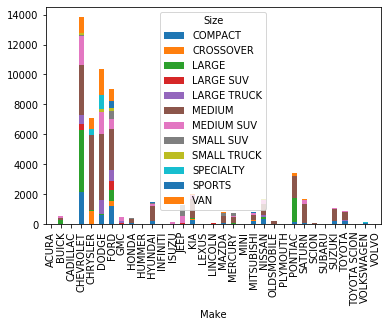

In [129]:
pclass_xt = pd.crosstab(df['Make'], df['Size'])
pclass_xt.plot(kind='bar', stacked=True)

In [130]:
df[df['Size'].isnull()][['TopThreeAmericanName', 'Transmission', 'Model', 'Make', 'Color']]

,TopThreeAmericanName,Transmission,Model,Make,Color
15769,OTHER,AUTO,SIERRA 1500,GMC,WHITE
18532,OTHER,AUTO,NITRO 4WD V6,DODGE,WHITE
20016,OTHER,AUTO,PATRIOT 2WD 4C,JEEP,SILVER
35157,OTHER,AUTO,PATRIOT 2WD 4C,JEEP,BLACK


In [131]:
df['Size'] = df.groupby(['Make']).Size.apply(lambda x: x.fillna(x.mode()[0]))
df['Size'].isnull().sum()

0

Sub model è strano, ho pensato di raggruppare su make e modello, e prendere la moda di quello

In [132]:
df[df['SubModel'].isnull()][['TopThreeAmericanName', 'Nationality', 'Model', 'Make', 'SubModel']]

,TopThreeAmericanName,Nationality,Model,Make,SubModel
23019,GM,AMERICAN,IMPALA 3.4L V6 SFI,CHEVROLET,NaN
28280,FORD,AMERICAN,FREESTAR FWD V6 3.9L,FORD,NaN
28961,GM,AMERICAN,GRAND AM V6 3.4L V6,PONTIAC,NaN
33225,FORD,AMERICAN,MOUNTAINEER 2WD V8 4,MERCURY,NaN
35224,CHRYSLER,AMERICAN,STRATUS V6 2.7L V6 M,DODGE,NaN
48641,CHRYSLER,AMERICAN,STRATUS V6 2.7L V6 M,DODGE,NaN
50661,GM,AMERICAN,S10 PICKUP 2WD 4C 2.,CHEVROLET,NaN


In [133]:
df['SubModel'] = df.groupby([df['Make'], df['Model']]).Size.apply(lambda x: x.fillna(x.mode()[0]))
df['SubModel'].isnull().sum()

0

In [134]:
sum_ = df.isnull().sum()
sum_[sum_ != 0]

Trim          1911
WheelType     2577
AAAP            13
AACP            13
ARAP            13
ARCP            13
CAAP            13
CACP            13
CRAP            13
CRCP            13
PRIMEUNIT    55703
AUCGUART     55703
dtype: int64

Perfetto, a questo punto nessun missing value è rimasto. Dobbiamo solo inserire la/e variabile/i da aggiungere per le medie, rimuovere quelle inutili e bone

In [148]:
df[df['AACP'] == 0][['VehBCost', 'AAAP', 'CACP']].count()

VehBCost    552
AAAP        552
CACP        552
dtype: int64

# CLUSTERING

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [37]:
df_clus = df.drop(columns=['RefId',
        'PurchDate',
        'IsBadBuy',
        'Auction',
        'Make',
        'Model',
        'Trim',
        'WheelTypeID',
        'WheelType',
        'Nationality',
        'Size',
        'Color',
        'Transmission',
        'PRIMEUNIT',
        'AUCGUART',
        'BYRNO',
        'VNST',
        'TopThreeAmericanName',
        'SubModel',
        'VehYear',
        'VNZIP1',
        'VehicleAge',
        'IsOnlineSale',
        'Region',
        'IsBase'])
df_clus.dropna(inplace=True)
len(df_clus)
df_clus.head()

,VehOdo,AAAP,AACP,ARAP,ARCP,CAAP,CACP,CRAP,CRCP,VehBCost,WarrantyCost
0,61184,6796.0,7555.0,10140.0,10805.0,6628.0,7535.0,9605.0,10650.0,6100.0,533
1,92383,5480.0,6461.0,6418.0,7478.0,5480.0,6461.0,6418.0,7478.0,4000.0,1630
2,45965,8067.0,8580.0,11073.0,11652.0,7497.0,8102.0,10721.0,11350.0,7500.0,693
3,80169,4817.0,6658.0,5702.0,7691.0,4817.0,6658.0,5702.0,7691.0,4725.0,1633
4,77372,5430.0,6633.0,6364.0,7664.0,5370.0,6811.0,6300.0,7856.0,5670.0,1623


## K-Means with Z-Score

In [38]:
scaler = StandardScaler()
z_df_clus = scaler.fit_transform(df_clus.values)

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [40]:
kmeans = KMeans(n_clusters=5, n_init=50, max_iter=500)
kmeans.fit(z_df_clus)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=5, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

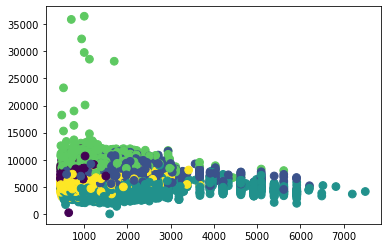

In [41]:
plt.scatter(df_clus['WarrantyCost'], df_clus['VehBCost'], 
            c=kmeans.labels_, s=60)

## K-Means with MinMax

In [42]:
scaler = MinMaxScaler()
minmax_df_clus = scaler.fit_transform(df_clus.values)

In [43]:
kmeans_2 = KMeans(n_clusters=5, n_init=50, max_iter=500)
kmeans_2.fit(minmax_df_clus)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=5, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

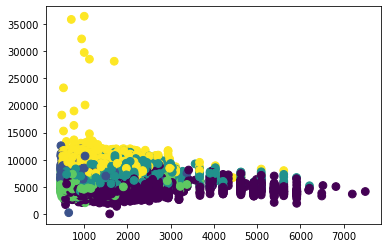

In [44]:
plt.scatter(df_clus['WarrantyCost'], df_clus['VehBCost'], 
            c=kmeans_2.labels_, s=60)

## DBSCAN

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(x_)

plt.scatter(df_['WarrantyCost'], df_['VehBCost'], 
            c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major')
plt.show()

## Hierarchical Clustering

In [45]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [46]:
df_clus.columns

Index(['VehOdo', 'AAAP', 'AACP', 'ARAP', 'ARCP', 'CAAP', 'CACP', 'CRAP',
       'CRCP', 'VehBCost', 'WarrantyCost'],
      dtype='object')

Eliminate alcune colonne + ridotto il dataset a 1000 righe

In [47]:
df_h = df_clus[['WarrantyCost','VehBCost','VehOdo']]
df_h = df_h[0:5000]

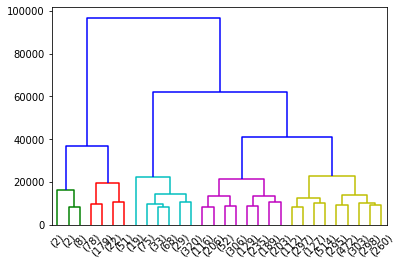

In [53]:
data_dist = pdist(df_h, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=25000, truncate_mode='lastp')